Try again using the SMOTE technique


Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       753
           1       0.71      0.77      0.74       227

    accuracy                           0.87       980
   macro avg       0.82      0.84      0.83       980
weighted avg       0.88      0.87      0.87       980



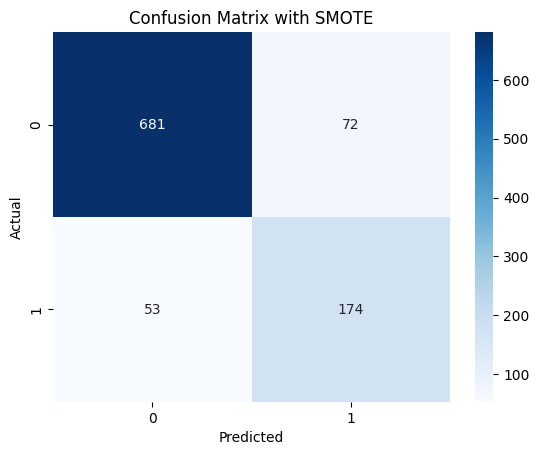

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the dataset
white_whine = pd.read_csv('./resources/winequality-white.csv', sep=';')
white_whine['quality'] = white_whine['quality'].apply(lambda x: 1 if x >= 7 else 0)
X = white_whine.drop('quality', axis=1)
y = white_whine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
rf_classifier_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_smote.fit(X_train_res, y_train_res)
y_pred_smote = rf_classifier_smote.predict(X_test)
print("\nClassification Report with SMOTE:")
print(classification_report(y_test, y_pred_smote))

cm = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with SMOTE')
plt.show()